## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [63]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

169.29061889648438


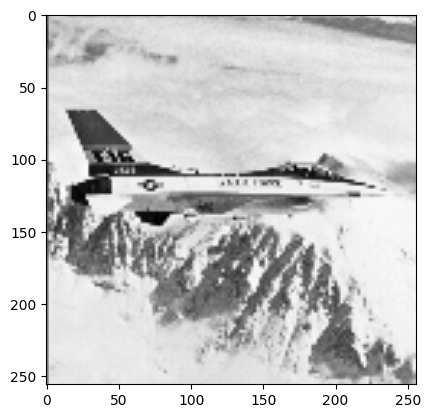

In [64]:
image = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")
mean = cv2.mean(image)
mean = list(mean)[0]
print(mean)

In [65]:
hist = cv2.calcHist([image],[0],None,[256],[0,256])
hist1=hist[:int(mean)]
hist2=hist[int(mean):]

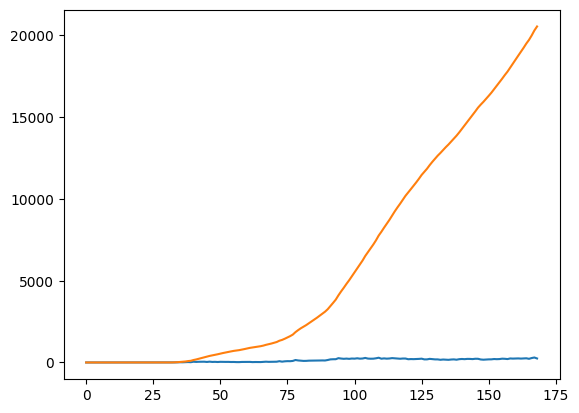

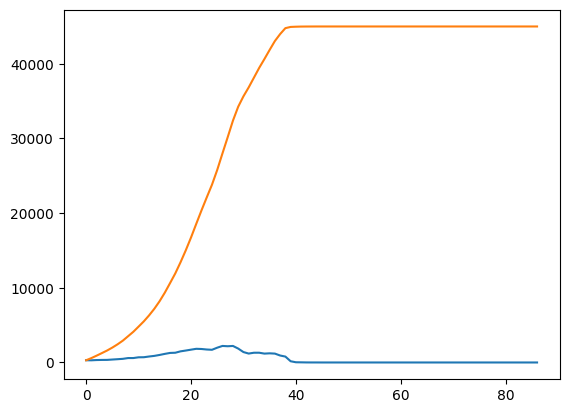

In [66]:
plt.plot(hist1)
cum_hist_1=np.cumsum(hist1)
plt.plot(cum_hist_1)
plt.show()
plt.plot(hist2)
cum_hist_2=np.cumsum(hist2)
plt.plot(cum_hist_2)
plt.show()

In [67]:
norm_cum_hist_1=cum_hist_1/np.max(cum_hist_1)
norm_cum_hist_2=cum_hist_2/np.max(cum_hist_2)

In [69]:
c1=int(mean)*norm_cum_hist_1
c2=int(mean)+1+(255-int(mean)-1)*norm_cum_hist_2
print(c1.shape)


(169,)


In [70]:
c=np.concatenate((c1,c2))

In [71]:
c=c.astype("uint8")

In [72]:
c.shape

(256,)

In [77]:
img = cv2.LUT(image,c,None)
# plt.imshow(img)

In [74]:
img = cv2.LUT(image,c,None)

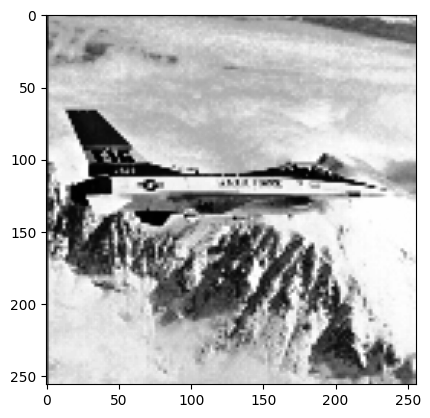

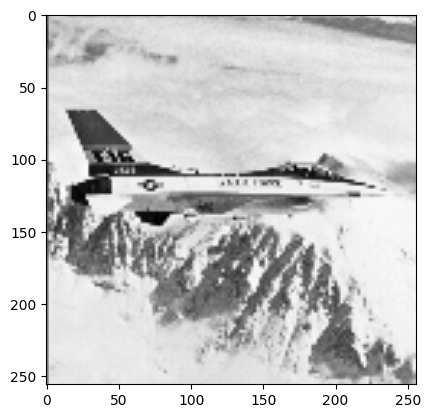

In [76]:
plt.imshow(img,cmap="gray")
plt.show()
plt.imshow(image,cmap="gray")
plt.show()